### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import Counter
from wordcloud import WordCloud

In [2]:
import sys, os, importlib

module_path = os.path.abspath('../src/ml')
if module_path not in sys.path:
  sys.path.append(module_path)

import text_preprocessing
importlib.reload(text_preprocessing)

<module 'text_preprocessing' from 'd:\\deteksi-judi-online\\src\\ml\\text_preprocessing.py'>

### Overview Dataset

In [3]:
raw_data_df = pd.read_csv('../data/raw/youtube_chat_jogja_clean.csv')
raw_data_df.head()

,datetime,author_name,message,cleaned_message,label
0,2024-10-07 08:32:03,KUSUMA,assalamu'alaikum..,assalamualaikum,0
1,2024-10-07 08:58:42,Tata PaNda,wa'alaikumussalam,waalaikumussalam,0
2,2024-10-07 09:20:29,Nimas putri Paranata,udah lewat 22 menit ni,udah lewat 22 menit ni,0
3,2024-10-07 09:30:23,proboyuwono djogdja,16:30 wib,1630 wib,0
4,2024-10-07 09:34:59,Vian Noorcha Putra,Tribun Tv Mana Ini Kenapa Acaranya Belum Dimul...,tribun tv mana ini kenapa acaranya belum dimul...,0


In [4]:
# data dengan label promosi judi online
raw_data_df.loc[raw_data_df['label'] == 1].sample(5)[['message', 'label']]

,message,label
5610,FREEBET 100RB :fire:WISDOMTOTO:fire:,1
2470,KETIK DI GOOGLE:WISDOMTOTO,1
4167,SLOT GACOR:fire: WISDOMTOTO:fire:,1
4758,KETIK DI GOOGLE:WISDOMTOTO,1
2677,100RB GRATIS WISDOMTOTO:fire:,1


In [5]:
# data dengan label non promosi judi online
raw_data_df.loc[raw_data_df['label'] == 0].sample(5)[['message', 'label']]

,message,label
6221,jogja istimewa,0
3632,drone gak jelas pusing liate:grinning_face_wit...,0
927,NONTON...SEKO CIBINONG,0
4364,:fire:ANGKA TERBALIK DI BAYAR:fire:,0
1858,nek wes tuo pertumbuhan.e stuck ... sok nek 80...,0


### Info Dataset

In [6]:
print(f'jumlah baris dan kolom: {raw_data_df.shape}')

jumlah baris dan kolom: (6350, 5)


In [7]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6350 entries, 0 to 6349
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   datetime         6350 non-null   object
 1   author_name      6350 non-null   object
 2   message          6348 non-null   object
 3   cleaned_message  6348 non-null   object
 4   label            6350 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 248.2+ KB


### Cek Data Duplikat

In [8]:
print(f'jumlah data duplkat {raw_data_df.duplicated().sum()}')

jumlah data duplkat 0


### Cek Data Kosong

In [9]:
raw_data_df.isnull().sum()

datetime           0
author_name        0
message            2
cleaned_message    2
label              0
dtype: int64

In [10]:
raw_data_df.loc[raw_data_df['message'].isnull()]

,datetime,author_name,message,cleaned_message,label
677,2024-10-07 11:55:13,PunthukWetan_Girimerto38,NaN,NaN,0
1133,2024-10-07 12:15:56,Ayu ri97,NaN,NaN,0


In [11]:
# menghapus data kosong
raw_data_df.dropna(inplace=True)
raw_data_df.isnull().sum()

datetime           0
author_name        0
message            0
cleaned_message    0
label              0
dtype: int64

### Distribusi Label (Promosi / Non-Promosi)

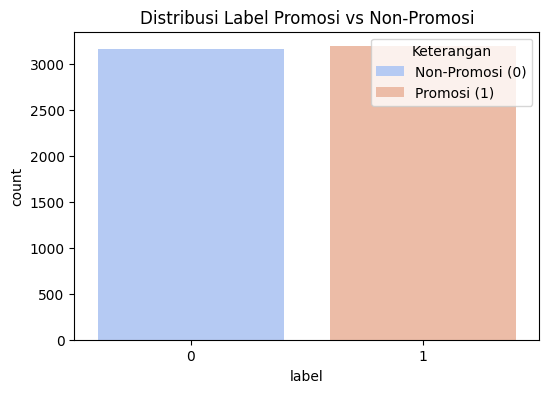

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x=raw_data_df['label'], hue=raw_data_df['label'], palette='coolwarm')
plt.title('Distribusi Label Promosi vs Non-Promosi')
plt.legend(title='Keterangan', labels=['Non-Promosi (0)', 'Promosi (1)'])
plt.show()

### Distribusi Panjang Teks dalam Dataset

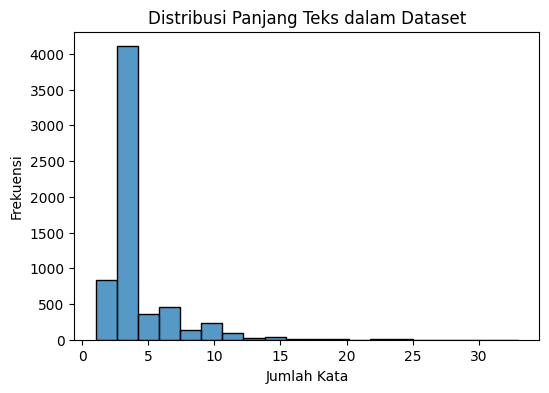

In [13]:
raw_data_df['text_length'] = raw_data_df['message'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(6, 4))
sns.histplot(raw_data_df['text_length'], bins=20)
plt.title('Distribusi Panjang Teks dalam Dataset')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

In [14]:
print(f'Rata-rata panjang kata dalam dataset: {int(raw_data_df["text_length"].mean())}')

Rata-rata panjang kata dalam dataset: 4


### Kata yang Sering Digunakan

In [15]:
all_words = list(itertools.chain(*raw_data_df['message'].apply(lambda x: str(x).lower().split())))
word_counts = Counter(all_words)
word_counts.most_common(10)

[('di', 1702),
 ('100rb', 1503),
 ('wisdomtoto:fire:', 1243),
 ('ketik', 1160),
 ('freebet', 944),
 ('google:wisdomtoto', 931),
 (':fire:wisdomtoto:fire:', 735),
 ('gratis', 575),
 ('jogja', 358),
 ('slot', 324)]

In [16]:
def cleaning_text(text: str):
  text = text_preprocessing.remove_emoji(text)
  text = text_preprocessing.to_lower(text)
  text = text_preprocessing.remove_punctuation(text)
  text = text_preprocessing.remove_stopwords(text)
  return text

raw_data_cleaned_df = raw_data_df.copy()
raw_data_cleaned_df['message'] = raw_data_cleaned_df['message'].apply(lambda x: cleaning_text(str(x)))

In [17]:
all_words = list(itertools.chain(*raw_data_cleaned_df['message'].apply(lambda x: str(x).split())))
word_counts = Counter(all_words)
word_counts.most_common(10)

[('100rb', 1503),
 ('wisdomtoto', 1255),
 ('ketik', 1160),
 ('freebet', 944),
 ('googlewisdomtoto', 931),
 ('gratis', 575),
 ('jogja', 388),
 ('slot', 326),
 ('gacor', 267),
 ('bayar', 243)]

### WordCloud

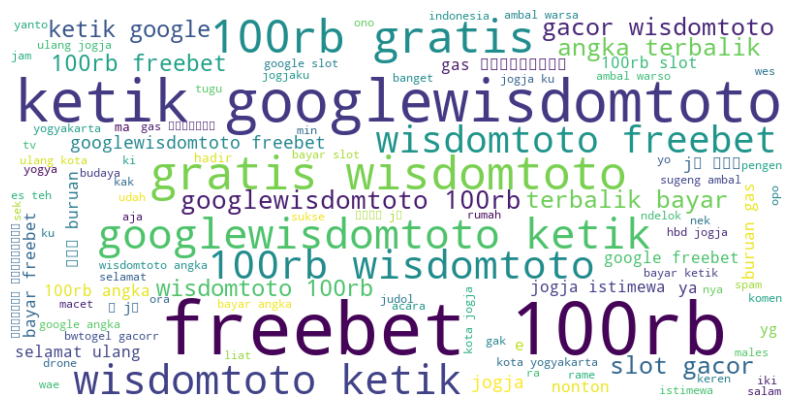

In [18]:
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      min_font_size=10, max_words=100).generate(' '.join(all_words))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Simpan Dataset

In [19]:
raw_data_df.to_csv('../data/processed/dataset_explored.csv', index=False)